In [1]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt

Scattering processes tend to have a cauchy distribution of photon energies


In [2]:
#import various modules we've been using

import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate
from scipy.special import factorial

# Binomial distributions for small $p$

Let's plot the distribution of expected accidents in Pittsburgh per day, either calculating from the number of accidents per minute or per second.


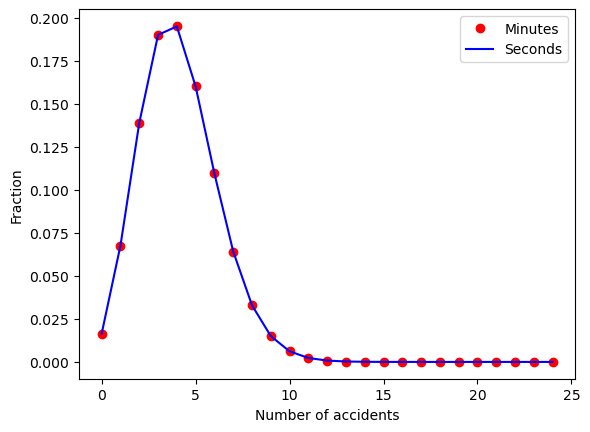

In [3]:
from scipy.special import comb,factorial

x=np.arange(25)

events_from_minutes=comb(1440,x)*2.85E-3**x*(1-2.85E-3)**(1440-x)

events_from_seconds=comb(86400,x)*4.75E-5**x*(1-4.75E-5)**(86400-x)
poisson=4.1**x * np.exp(-4.1)/factorial(x)

# provide the label= keyword to make curves show up in the legend
plt.plot(x,events_from_minutes,'ro',label='Minutes')
plt.plot(x,events_from_seconds,'b-',label='Seconds')

plt.xlabel('Number of accidents')
plt.ylabel('Fraction')

# cause the legend to be drawn
plt.legend()


# The Poisson distribution

The probability of k occurrences from a poisson distribution of mean $\lambda$ is given by $p(k) = {{\lambda^k \exp(-\lambda)} \over {k!}}$ .

__Using the below code box, plot Poisson distributions for $\lambda$ = 1, 4, and 10 and k ranging from 0 to 25; label all curves and add a legend.__  You may want to use `scipy.stats.poisson` for convenience; otherwise you will need to use the `factorial` function (imported at the top of the notebook).

In [25]:
# Example: lambda = 1
from scipy.special import factorial
k = np.arange(25)
# we shouldn't use lambda as a variable name as it is a Python keyword (which we will use later...)
lambdap=[1,4,10]
for lambdah in lambdap,in zip(["red", "blue", "green"]):
        plt.plot(k,lambdah**k*np.exp(-lambdah)/factorial(k),'r.',label=r'$\lambda$ = 1')
#for different marker options see: https://matplotlib.org/api/markers_api.html


plt.xlabel("Number of incidents")
plt.ylabel("Fraction")
plt.legend()
plt.show()

SyntaxError: expected ':' (4060524140.py, line 6)

# Asymmetry of the Poisson distribution

We can never observe fewer than zero events.  As a result, the Poisson distribution is very asymmetric when $\lambda$ is small.  How low does $\lambda$ need to be for this to be a big issue?

Text(0, 0.5, 'Probability of zero events')

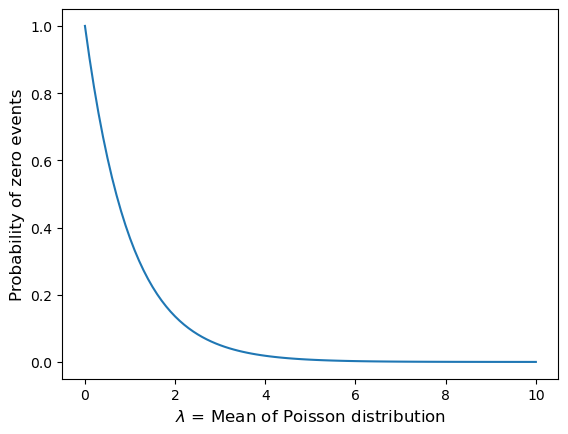

In [10]:

x=np.linspace(0,10,101)
plt.plot(x,x**0*np.exp(-x)/factorial(0))
plt.xlabel(r'$\lambda$ = Mean of Poisson distribution',size='large')
plt.ylabel('Probability of zero events',size='large')

# Try this code box with and without the following line commented out:
#plt.yscale('log')


# Priors for the Poisson distribution

Jeffreys prior: $p(\lambda) \propto \lambda^{-1/2}$

The below code plots the likelihood & posterior for the Poisson parameter $\lambda$ if $N=1$ events are observed.  __Replot the curves for cases where N = 3, 5, or 10 events were seen (just modify the code, don't add more curves).__  
 
__Evaluate how both the peak of the likelihood and posterior correspond to the observed # of events, N, in each case (indicated via the dashed red curve).__

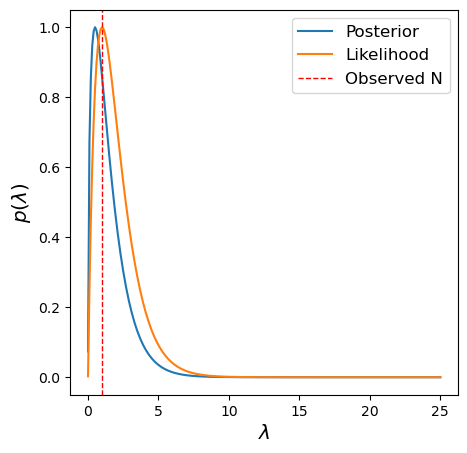

In [19]:
plt.figure(figsize=(5,5))

# set up an array of possible lambda values
lam_arr=np.linspace(0,25,251)+1.E-3

# this is the observed number of events
N=1

# Jeffreys prior: 1/sqrt(lambda)
likelihood = lam_arr**(N)*np.exp(-lam_arr)
posterior = lam_arr**(N-0.5)*np.exp(-lam_arr)


# Note: We are making the maximum 1 for convenience, but these are not being normalized into PDFs.
plt.plot(lam_arr,posterior/np.max(posterior),label='Posterior')
plt.plot(lam_arr,likelihood/np.max(likelihood),label='Likelihood')
plt.xlabel(r'$\lambda$',size='x-large')
plt.ylabel(r'$p(\lambda)$',size='x-large')

#draw a vertical line at N.  How do the peak of the likelihood and posterior compare to the observed # of events?
plt.axvline(N,color='red',ls='--',lw=1,label='Observed N')

plt.legend(fontsize='large')


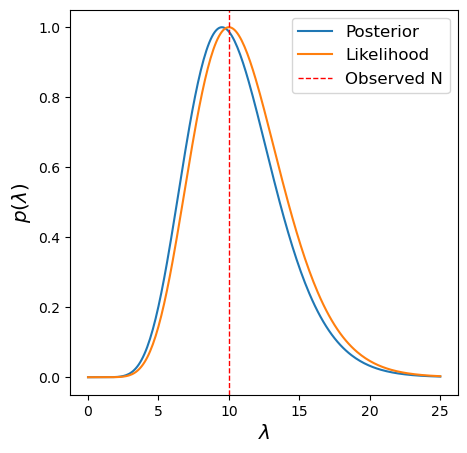

In [27]:
plt.figure(figsize=(5,5))

# set up an array of possible lambda values
lam_arr=np.linspace(0,25,251)+1.E-3

# this is the observed number of events
N=10 

# Jeffreys prior: 1/sqrt(lambda)
likelihood = lam_arr**(N)*np.exp(-lam_arr)
posterior = lam_arr**(N-0.5)*np.exp(-lam_arr)


# Note: We are making the maximum 1 for convenience, but these are not being normalized into PDFs.
plt.plot(lam_arr,posterior/np.max(posterior),label='Posterior')
plt.plot(lam_arr,likelihood/np.max(likelihood),label='Likelihood')
plt.xlabel(r'$\lambda$',size='x-large')
plt.ylabel(r'$p(\lambda)$',size='x-large')

#draw a vertical line at N.  How do the peak of the likelihood and posterior compare to the observed # of events?
plt.axvline(N,color='red',ls='--',lw=1,label='Observed N')

plt.legend(fontsize='large')

# The Gaussian distribution

Let's explore what happens when we change parameters of the Gaussian distribution, 
$f(x) = {1 \over \sqrt{2 \pi \sigma^2}} e^{-(x-\mu)^2 \over 2\sigma^2}$.

  __Try changing mu to a few different values in the code below.__

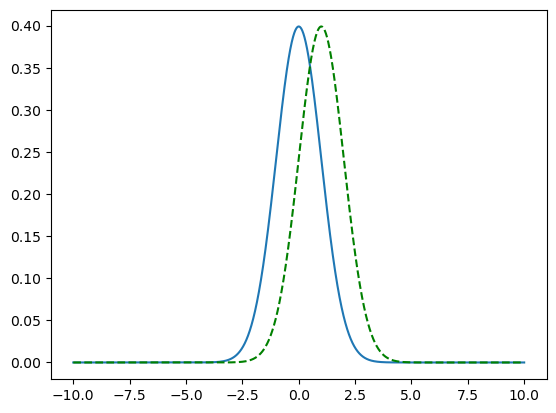

In [26]:
x=np.linspace(-10,10,20001)
mu=0.
sigma=1
plt.plot(x,1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2./sigma**2))
mu=1
plt.plot(x,1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2./ sigma**2),'g--')

### Changing the value of sigma

__In the below code box, define variables y2, using sigma=2, and y0_2, using sigma=0.2; plot up all 3 curves (y1,y0_2,y2) together in the same plot.__

__Then try making the y axis logarithmic (how do we do that?)  and explain what you see.__



AttributeError: module 'matplotlib.pyplot' has no attribute 'scale'

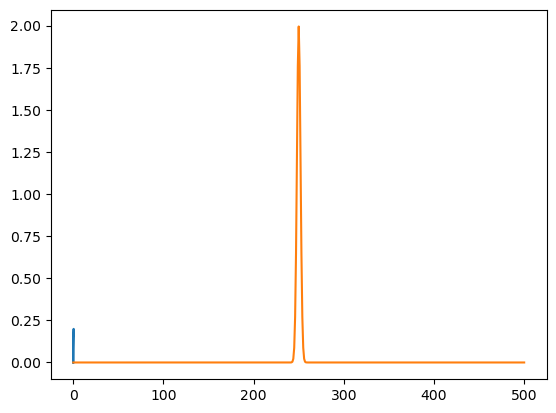

In [38]:
mu=0
sigma=1
y1=1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2./sigma**2)
Sigma=2
y2=1/np.sqrt(2*np.pi*Sigma**2)*np.exp(-(x-mu)**2/2./Sigma**2)
sigmaa=0.2
y02=1/np.sqrt(2*np.pi*sigmaa**2)*np.exp(-(x-mu)**2/2./sigmaa**2)
plt.plot(y1,y2,y02)
plt.scale('log')


## Testing Gaussian integrals

We expect probability 0.68268949 for being between -1 sigma to +1 sigma, probability 0.95449974 between -2 sigma and +2 sigma.  __Do we find the same from numerical integration?__  

In [31]:
x=np.linspace(-25,25,501)
mu=0
sigma=1
y1=1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2./sigma**2)

interp_1=interpol.interp1d(x,y1,kind='cubic') 

print(f'integrals for standard Gaussian: \
 {integrate.quad(interp_1,-1,1,epsrel=1.e-4)[0]:.8f}, \
 {integrate.quad(interp_1,-2,2,epsrel=1.e-4)[0]:.8f}')

mu=0.
sigma=10.
y10=1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2./sigma**2)

interp_10=interpol.interp1d(x,y10,kind='cubic') 

print(f'integrals for sigma=10 Gaussian: \
 {integrate.quad(interp_10,-10,10,epsrel=1.e-4)[0]:.8f}, \
 {integrate.quad(interp_10,-20,20,epsrel=1.e-4)[0]:.8f}')

print('Expected values:                  0.68268949,  0.95449974')

integrals for standard Gaussian:  0.68268935,  0.95449999
integrals for sigma=10 Gaussian:  0.68268949,  0.95449974
Expected values:                  0.68268949,  0.95449974


## Generating Gaussian random variables 

We can generate Gaussian random variables with mean 0 and sigma 1 using the function `numpy.random.randn()`, which works just like `numpy.random.rand()`.

__Repeatedly execute the following code, and see how your histograms change.__


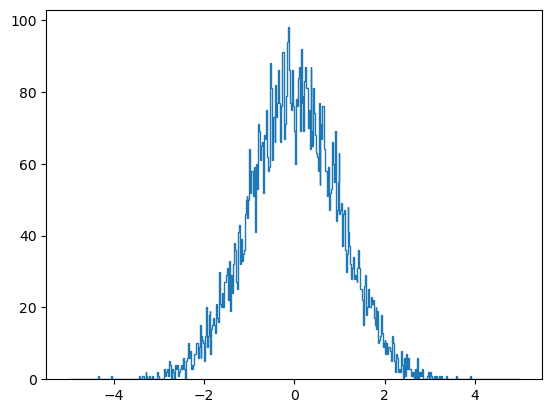

In [32]:
import numpy.random as random
bin_array=np.linspace(-5,5,501)
nrandom=int(1E4)
n,bins,patches=plt.hist(random.randn(nrandom),bins=bin_array,histtype='step') 


__In the below code box, make a histogram from Gaussian random data drawn from the distribution N(5,$5^2$) (i.e, with mu=5 and sigma=5).__  Recall that since the center shifts with $\mu$ and the width is proportional to $\sigma$, we can get numbers distributed as $N(\mu,\sigma^2)$ by transforming random values from the standard normal distribution. I.e. we generate a value $x'$ from $N(\mu,\sigma^2)$ by 

$x'= \sigma x + \mu$,

where $x$ is a random variable distributed as $N(0,1)$.

__Be sure to adjust your histogram binning so you can reasonably see the properties of the distribution.__

# Bayesian Analysis of Gaussian data

Suppose we have some measured value for x, where we expect x to come from a Gaussian of some unknown $\mu$, but with known $\sigma=2$, i.e., N($\mu$,2$^2$).

__What is the posterior for $\mu$ given a single measurement (say, x=5), using the Jeffreys prior prob($\mu$) = 1?__  Fill in the missing pieces below!!!

Reminder: the formula for a Gaussian is $f(x) = { 1 \over {\sqrt{2 \pi \sigma^2}}} {\rm exp}(-{ {(x-\mu)^2} \over {2 \sigma^2}})$.

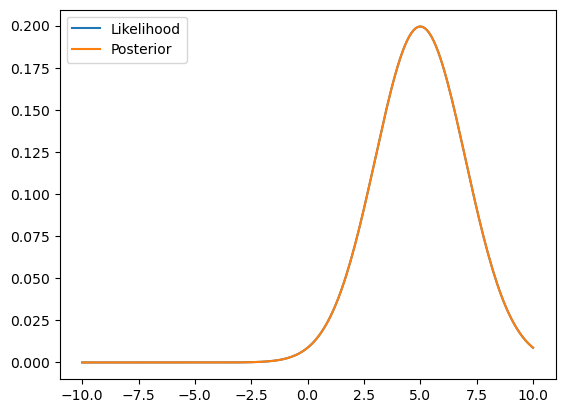

In [39]:
x=5
sigma=2

mu=np.linspace(-10,10,201)

# Fill in the likelihood below: what is p(x | mu)? 
likelihood = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Fill in the prior; we want a uniform prior, 
#   same size as the mu array, with value 1 everywhere
prior= np.ones_like(mu)
plt.plot(mu,likelihood,label='Likelihood')
plt.plot(mu,likelihood*prior,label='Posterior')
plt.legend()


In [40]:
?np.ones_like


Signature:      
np.ones_like(
    a,
    dtype=None,
    order='K',
    subok=True,
    shape=None,
    *,
    device=None,
)
Call signature:  np.ones_like(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function ones_like at 0x10c9d5da0>
File:            ~/.local/share/mamba/envs/datascience/lib/python3.13/site-packages/numpy/_core/numeric.py
Docstring:      
Return an array of ones with the same shape and type as a given array.

Parameters
----------
a : array_like
    The shape and data-type of `a` define these same attributes of
    the returned array.
dtype : data-type, optional
    Overrides the data type of the result.
order : {'C', 'F', 'A', or 'K'}, optional
    Overrides the memory layout of the result. 'C' means C-order,
    'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
    'C' otherwise. 'K' means match the layout of `a` as closely
    as possible.
subok : bool, optional.
    If True, then the newly created array will use the s

# Bayesian Analysis for $\sigma$

- Now suppose we have some measured value for x, where we expect x to come from a Gaussian of known mean $\mu=0$, but with unknown $\sigma$.

- __What is the likelihood for $\sigma$ and posterior for $\sigma$ given a single measurement (say, x=5), with prior prob($\sigma$) = 1/$\sigma$?__

  
__This time, be sure to normalize the posterior distribution to have integral 1.__  Recall that we used `interpol.interp1d` and `scipy.integrate.quad` for integration before.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpol
x=5
mu=0
sigma=np.linspace(0.,50.,501)+1.E-3 # want to avoid dividing 1/0
likelihood=(1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))
prior = 1/sigma
posterior=likelihood**prior
posterior_norm= interpol.interp1d(sigma,posterior,kind='cubic')
# norm = integrate.quad(posterior,-10,10)[0]
norm = integrate.quad(posterior,-10,10)[0]

plt.plot(sigma,likelihood,label='Likelihood') 
plt.plot(sigma,likelihood*prior/norm,label='Posterior')
plt.legend()





ValueError: invalid callable given

In [47]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.integrate as integrate
# import scipy.interpolate as interpol

# x = 5
# mu = 0
# sigma = np.linspace(0., 50., 501) + 1.E-3  # Avoid dividing by zero

# # Likelihood function
# likelihood = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# # Prior: p(σ) = 1/σ
# prior = 1 / sigma

# # Unnormalized posterior
# posterior_unnorm = likelihood * prior

# # Interpolation function for integration
# posterior_interp = interpol.interp1d(sigma, posterior_unnorm, kind='cubic', fill_value="extrapolate")

# # Compute normalization constant
# norm = integrate.quad(posterior_interp, sigma.min(), sigma.max())[0]

# # Normalized posterior
# posterior = posterior_unnorm / norm

# # Plot results
# plt.plot(sigma, likelihood, label='Likelihood')
# plt.plot(sigma, posterior, label='Posterior')
# plt.legend()
# plt.xlabel(r'$\sigma$')
# plt.ylabel('Probability Density')
# plt.title('Bayesian Analysis for $\sigma$')
# plt.show()


# If you have extra time

- __Normalize the likelihood for $\sigma$, not just the posterior.  Why is the integral of the raw likelhood not 1?__
- __Calculate the likelihood and Bayesian posterior for the variance $V = \sigma^2$.  Normalize your curves to peak at 1.__  The Jeffreys prior for variance of a Gaussian is $p(V)=1/V$.  How does your estimate for V compare to your estimate for $\sigma$?